In [2]:
#importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [4]:
import missingno as msno
%matplotlib inline

In [16]:
#importing datasets
train = pd.read_csv('datasets/music-dataset/train.csv')
members = pd.read_csv('datasets/music-dataset/members.csv')
test = pd.read_csv('datasets/music-dataset/test.csv')
songs = pd.read_csv('datasets/music-dataset/songs.csv')
song_extra_info = pd.read_csv('datasets/music-dataset/song_extra_info.csv')

In [17]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [18]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0.0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1.0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2.0,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [19]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [20]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [21]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19932 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [23]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 7 columns):
song_id        39999 non-null object
song_length    39999 non-null int64
genre_ids      39282 non-null object
artist_name    39999 non-null object
composer       23203 non-null object
lyricist       10913 non-null object
language       39999 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [24]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


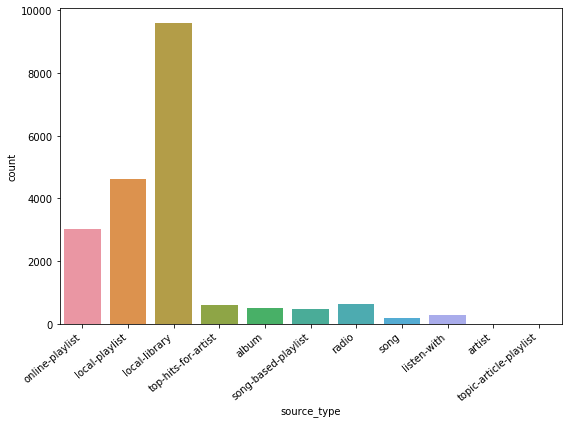

In [29]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='source_type',data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

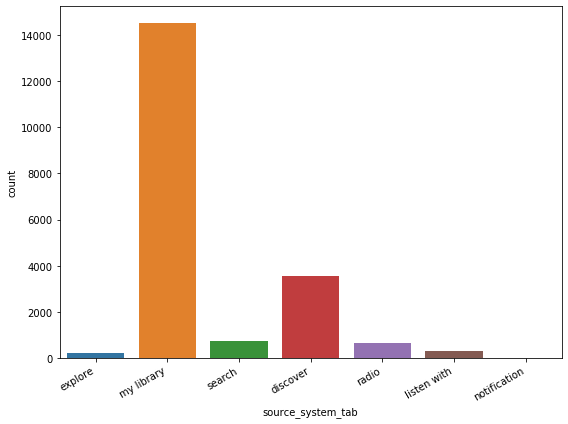

In [30]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='source_system_tab',data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.tight_layout()
plt.show()

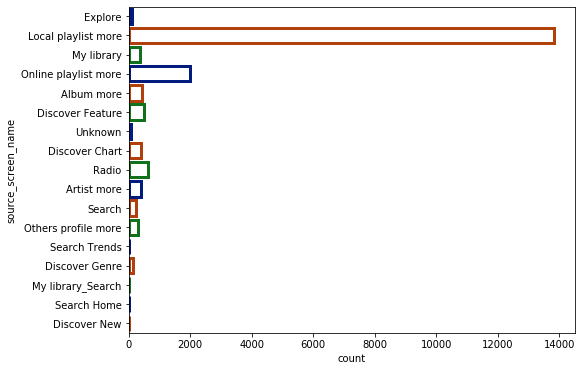

In [31]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y=train['source_screen_name'],data=train,facecolor=(0,0,0,0),linewidth=3,edgecolor=sns.color_palette('dark',3))
plt.show()

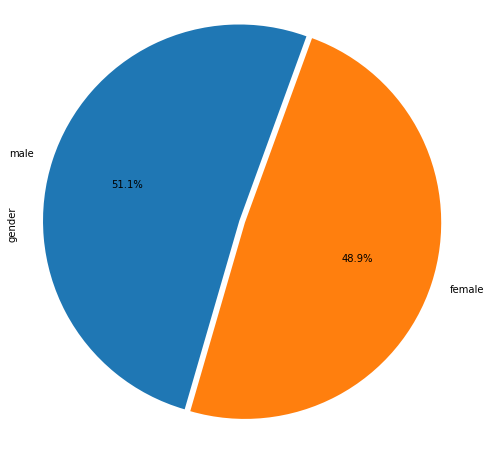

In [56]:
#plotting the pie chart for gender information
plt.figure(figsize=(8,8))
pp = pd.value_counts(members.gender)
pp.plot.pie(startangle=70,autopct='%1.1f%%',shadow=False,explode=(0.015,0.015))
plt.axis('equal')
plt.show()

In [41]:
#merging datasets over similar columns
#training dataset
train_members = pd.merge(train , members , on='msno',how='inner')
train_merged = pd.merge(train_members,songs ,on='song_id',how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')

#test dataset
test_members = pd.merge(test , members , on='msno',how='inner')
test_merged = pd.merge(test_members,songs ,on='song_id',how='outer')
print(test_merged.head())
print(len(test_merged.columns))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city    bd gender  \
0            Explore  online-playlist     1.0   1.0   0.0    NaN   
1            Explore  online-playlist     1.0   1.0   0.0    NaN   
2            Explore  online-playlist     1.0   1.0   0.0    NaN   
3     

In [42]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)

{dtype('float64'): Index(['target', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [43]:
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('float64'): Index(['id', 'city', 'bd', 'registered_via', 'registration_init_time',
       'expiration_date', 'song_length', 'language'],
      dtype='object'), dtype('O'): Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'gender', 'genre_ids', 'artist_name', 'composer',
       'lyricist'],
      dtype='object')}


In [51]:
#function to check missing values
def check_missing_values(df):
    print(df.isnull().values.any())
    if(df.isnull().values.any()==True):
        columns_with_NaN=df.columns[df.isnull().any()].to_list()
        print(columns_with_NaN)
        for col in columns_with_NaN:
            print('%s : %d' %(col,df[col].isnull().sum()))

In [52]:
check_missing_values(train_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38732
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154


In [53]:
check_missing_values(test_merged)

True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39527
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time : 39524
expiration_date : 39524
song_length : 4298
genre_ids : 5017
artist_name : 4298
composer : 21113
lyricist : 33461
language : 4298


In [59]:
#missing values should be avoided at all cost while working with any dataset so we have to replace NaN with some unique value.
#I will replace it with -4. Make sure the value should be unique.
#replacing float type missing vlaues with -4
def replace_Nan_non_object(df):
    object_columns = list(df.select_dtypes(include=['float']).columns)
    for col in object_columns:
        df[col]=df[col].fillna(np.int(-4))
    print(object_columns)    
        
replace_Nan_non_object(train_merged)
replace_Nan_non_object(test_merged)

['target', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']
['id', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']


In [58]:
#replacing object type missing vlaues with ' '(blank-space)
def replace_Nan_object(df):
    object_columns = list(df.select_dtypes(include=['object']).columns)
    for col in object_columns:
        df[col]=df[col].fillna(' ')
    print(object_columns)    
        
replace_Nan_object(train_merged)
replace_Nan_object(test_merged)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


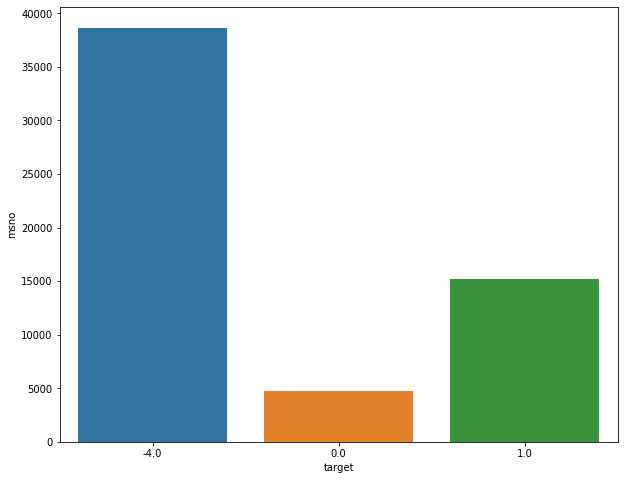

In [61]:
data = train_merged.groupby('target').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (10,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target',y='msno',data=data)

In [62]:
train_merged = train_merged[train_merged.target != -4]
len(train_merged.index)

19999

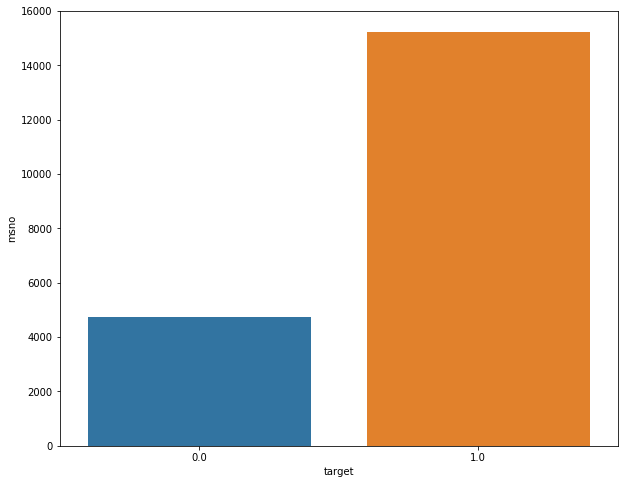

In [63]:
data = train_merged.groupby('target').aggregate({'msno' : 'count'}).reset_index()
a4_dims = (10,8)
fig,ax=plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target',y='msno',data=data)

In [64]:
#0.0 represents new users
#1.0 represents existing users

[Text(0, 0, '-4.0'),
 Text(0, 0, '-1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '24.0'),
 Text(0, 0, '31.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '59.0')]

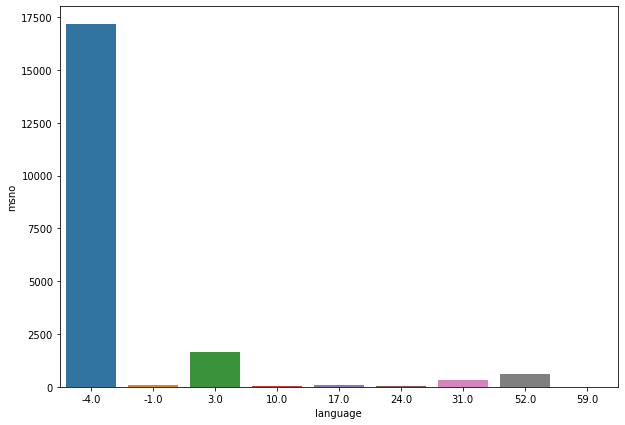

In [65]:
#finding out which language is popular
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims = (10,7)
fig, ax=plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='language',y='msno',data=data)
ax.set_xticklabels(ax.get_xticklabels())


[Text(0, 0, '1.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '15.0'),
 Text(0, 0, '16.0'),
 Text(0, 0, '17.0'),
 Text(0, 0, '18.0'),
 Text(0, 0, '20.0'),
 Text(0, 0, '21.0'),
 Text(0, 0, '22.0')]

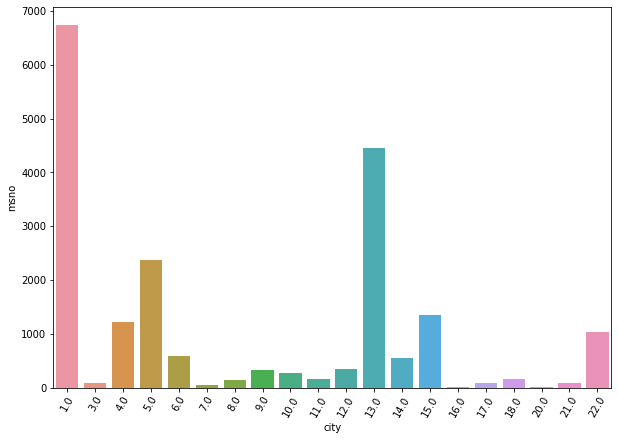

In [67]:
#finding out which city listens most
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (10,7)
fig, ax=plt.subplots(figsize=a4_dims)
ax= sns.barplot(x='city',y='msno',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [121]:
df= pd.read_csv('datasets/music-dataset/train.csv')
df= df.sample(frac=0.1)
songs= pd.read_csv('datasets/music-dataset/songs.csv')
members= pd.read_csv('datasets/music-dataset/members.csv')

In [122]:
df= pd.merge(df,songs, on='song_id',how='left')
df= pd. merge(df,members, on ='msno', how='left')

del songs
del members

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 18 columns):
msno                      2000 non-null object
song_id                   2000 non-null object
source_system_tab         1992 non-null object
source_screen_name        1949 non-null object
source_type               1993 non-null object
target                    2000 non-null int64
song_length               305 non-null float64
genre_ids                 302 non-null object
artist_name               305 non-null object
composer                  243 non-null object
lyricist                  196 non-null object
language                  305 non-null float64
city                      2000 non-null int64
bd                        2000 non-null int64
gender                    1201 non-null object
registered_via            2000 non-null int64
registration_init_time    2000 non-null int64
expiration_date           2000 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 29

In [124]:
#percentage of missing values
df.isnull().sum()/df.isnull().count()*100

msno                       0.00
song_id                    0.00
source_system_tab          0.40
source_screen_name         2.55
source_type                0.35
target                     0.00
song_length               84.75
genre_ids                 84.90
artist_name               84.75
composer                  87.85
lyricist                  90.20
language                  84.75
city                       0.00
bd                         0.00
gender                    39.95
registered_via             0.00
registration_init_time     0.00
expiration_date            0.00
dtype: float64

In [125]:
#replace missing values
for i in df.select_dtypes(include = ['object']).columns:
    df[i][df[i].isnull()]='unknown'
df = df.fillna(value=0) 

In [126]:
#registration date
df.registration_init_time = pd.to_datetime(df.registration_init_time,format='%Y%m%d',errors='ignore')
df['registration_init_time_year']= df['registration_init_time'].dt.year
df['registration_init_time_month']= df['registration_init_time'].dt.month
df['registration_init_time_date']= df['registration_init_time'].dt.date

In [127]:
#expiration date
df.expiration_date = pd.to_datetime(df.expiration_date,format='%Y%m%d',errors='ignore')
df['expiration_date_year']= df['expiration_date'].dt.year
df['expiration_date_month']= df['expiration_date'].dt.month
df['expiration_date_date']= df['expiration_date'].dt.date

In [128]:
#converting dates into category
df['registration_init_time']=df['registration_init_time'].astype('category')
df['expiration_date']= df['expiration_date'].astype('category')

In [129]:
#converting objects into category
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].astype('category')

In [130]:
for col in df.select_dtypes(include=['category']).columns:
    df[col]=df[col].cat.codes

In [131]:
df=df.drop(['expiration_date','lyricist'],1)


In [132]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'language', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_date',
       'expiration_date_year', 'expiration_date_month',
       'expiration_date_date'],
      dtype='object')

In [133]:
#splitting training and test dataset
from sklearn import model_selection,metrics,ensemble

In [134]:
from xgboost.sklearn import XGBClassifier

In [135]:

train_data,test_data,train_labels,test_labels=model_selection.train_test_split(df,target,test_size=0.3)
del df

In [136]:
model = ensemble.RandomForestClassifier(n_estimators = 250,max_depth=25)
model.fit(train_data,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
model_pred = model.predict(test_data)
print(metrics.accuracy_score(test_labels,model_pred))

0.7266666666666667


In [168]:
#Our model is currently showing around 72% accuracy
model1 = XGBClassifier(learning_rate=0.01,max_depth=15,min_child_weight=5,n_estimators=250)
model1.fit(train_data,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=15, min_child_weight=5, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [169]:
model1_pred = model1.predict(test_data)
print(metrics.accuracy_score(test_labels,model1_pred))

0.7633333333333333


C:\Users\pavlion\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
#With XGBClassifier our model is achieving 76.33% accuracy